<a href="https://colab.research.google.com/github/hemanthkumar17/Probabilistic-Algorithms-Implementations/blob/main/Count_sketches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.utils import murmurhash3_32
import numpy as np
def hash_factory(m, seed_val):
    return lambda x: murmurhash3_32(x, seed = seed_val) % m

In [ ]:
import heapq

In [ ]:
!wget https://www.cim.mcgill.ca/~dudek/206/Logs/AOL-user-ct-collection/user-ct-test-collection-01.txt

--2023-11-10 21:51:31--  https://www.cim.mcgill.ca/~dudek/206/Logs/AOL-user-ct-collection/user-ct-test-collection-01.txt
Resolving www.cim.mcgill.ca (www.cim.mcgill.ca)... 132.206.70.20
Connecting to www.cim.mcgill.ca (www.cim.mcgill.ca)|132.206.70.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222762553 (212M) [text/plain]
Saving to: ‘user-ct-test-collection-01.txt.1’

user-ct-test-collec 100%[===================>] 212.44M  24.7MB/s    in 13s     

2023-11-10 21:51:44 (16.7 MB/s) - ‘user-ct-test-collection-01.txt.1’ saved [222762553/222762553]



In [ ]:
x = [0, 1, 6, 3, 4, 5, 2, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
heapq._siftup(x, 2)

In [ ]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
class CountMinSketch:
    def __init__(self, r, seedval, cstype="min"):
        self.heap = []
        self.hashes = [hash_factory(r, seed_val = seedval * x) for x in range(5)]
        self.sketch = np.zeros((5, r))
        self.cstype=cstype
        self.top500 = {}
    def insert(self, q):
        for x in range(5):
            self.sketch[x, self.hashes[x](q)] += 1

        test = np.abs(self.query(q))
        if q in self.top500:
            i = self.heap.index(self.top500[q])
            self.heap[i] = (test, q)
            heapq._siftup(self.heap, i)
            self.top500[q] = (test, q)
        else:
            if len(self.heap) >= 500:
                m = heapq.heappop(self.heap)
                if m[0] < test:
                    heapq.heappush(self.heap, (test, q))
                    self.top500[q] = (test, q)
                    del self.top500[m[1]]
                else:
                    heapq.heappush(self.heap, m)
            else:
                heapq.heappush(self.heap, (test, q))
                self.top500[q] = (test, q)
    def query(self, q):
        p = []
        for x in range(5):
            p.append(self.sketch[x, self.hashes[x](q)])
        if self.cstype == "min":
            return np.min(p)
        elif self.cstype == "median":
            return np.median(p)

In [ ]:
class CountSketch:
    def __init__(self, r, seedval, cstype="median"):
        self.hashes = [hash_factory(r, seed_val = seedval * x) for x in range(5)]
        self.sketch = np.zeros((5, r))
        self.cstype=cstype
        self.heap = []
        self.top500 = {}
    def insert(self, q):
        hasval = [self.hashes[x](q) for x in range(5)]
        for x in range(5):
            self.sketch[x, hasval[x]] += 1 * ((hasval[x-1] % 2)*2 - 1)

        test = np.abs(self.query(q))
        if q in self.top500:
            i = self.heap.index(self.top500[q])
            self.heap[i] = (test, q)
            heapq._siftup(self.heap, i)
            self.top500[q] = (test, q)
        else:
            if len(self.heap) >= 500:
                m = heapq.heappop(self.heap)
                if m[0] < test:
                    heapq.heappush(self.heap, (test, q))
                    self.top500[q] = (test, q)
                    del self.top500[m[1]]
                else:
                    heapq.heappush(self.heap, m)
            else:
                heapq.heappush(self.heap, (test, q))
                self.top500[q] = (test, q)

    def query(self, q):
        p = []
        hasval = [self.hashes[x](q) for x in range(5)]
        for x in range(5):
            p.append(self.sketch[x, self.hashes[x](q)] * ((hasval[x-1] % 2)*2 - 1))
        if self.cstype == "min":
            return np.abs(np.min(p))
        elif self.cstype == "median":
            return np.abs(np.median(p))

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
data = pd.read_csv("user-ct-test-collection-01.txt", sep="\t")
keywords = data["Query"].dropna().unique()

In [ ]:
keywords = " ".join(keywords).split(" ")

In [ ]:
import random
from collections import Counter
freq = Counter(keywords)
freq100 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:100][::-1]
infreq100 = sorted(freq.items(), key=lambda x: x[1])[:100]
random100 = sorted(random.sample(sorted(freq.items(), key=lambda x: x[1]), 100), key=lambda x: x[1])

In [ ]:
len(freq)

580462

In [ ]:
minsketches = []
medsketches = []
sketches = []
for r in [2**10, 2**14, 2**18]:
    minsketch = CountMinSketch(r, seedval=25)
    medsketch = CountMinSketch(r, seedval=79, cstype="median")
    sketch = CountSketch(r, seedval=277)
    for key in tqdm(keywords):
        minsketch.insert(key)
        medsketch.insert(key)
        sketch.insert(key)
    minsketches.append(minsketch)
    medsketches.append(medsketch)
    sketches.append(sketch)

100%|██████████| 3441247/3441247 [11:52<00:00, 4831.68it/s]


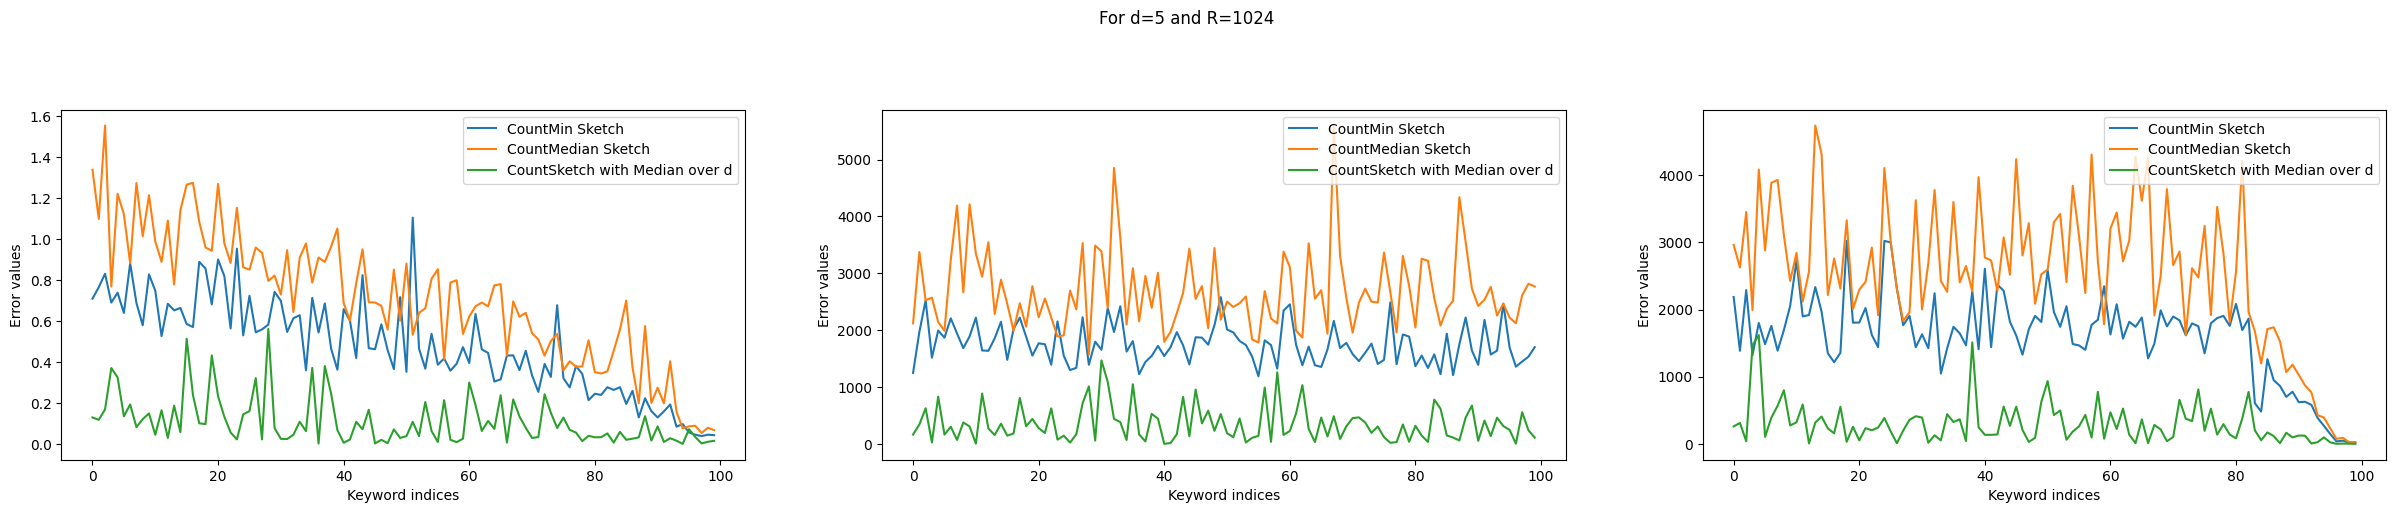

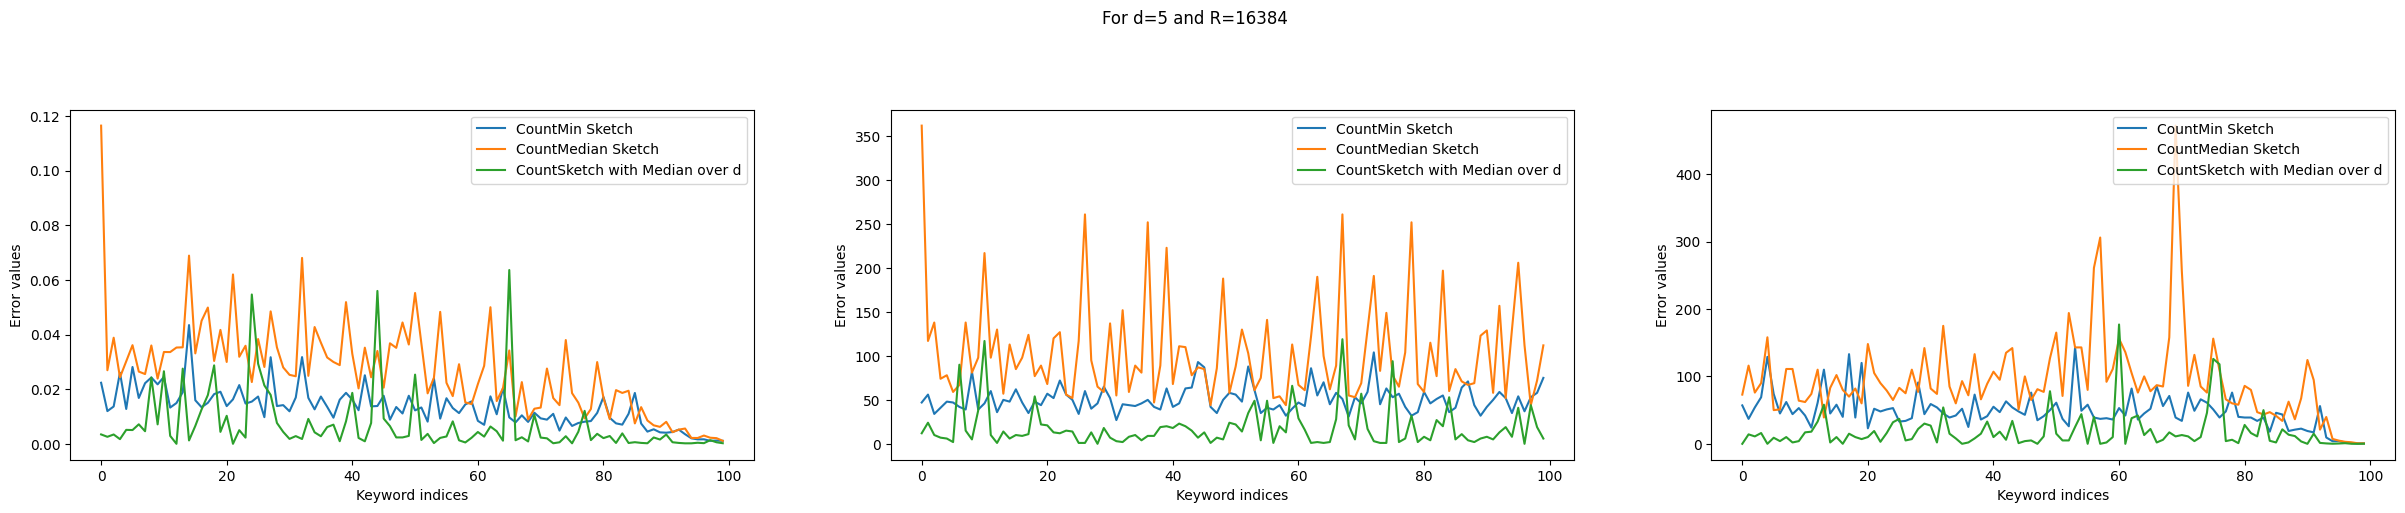

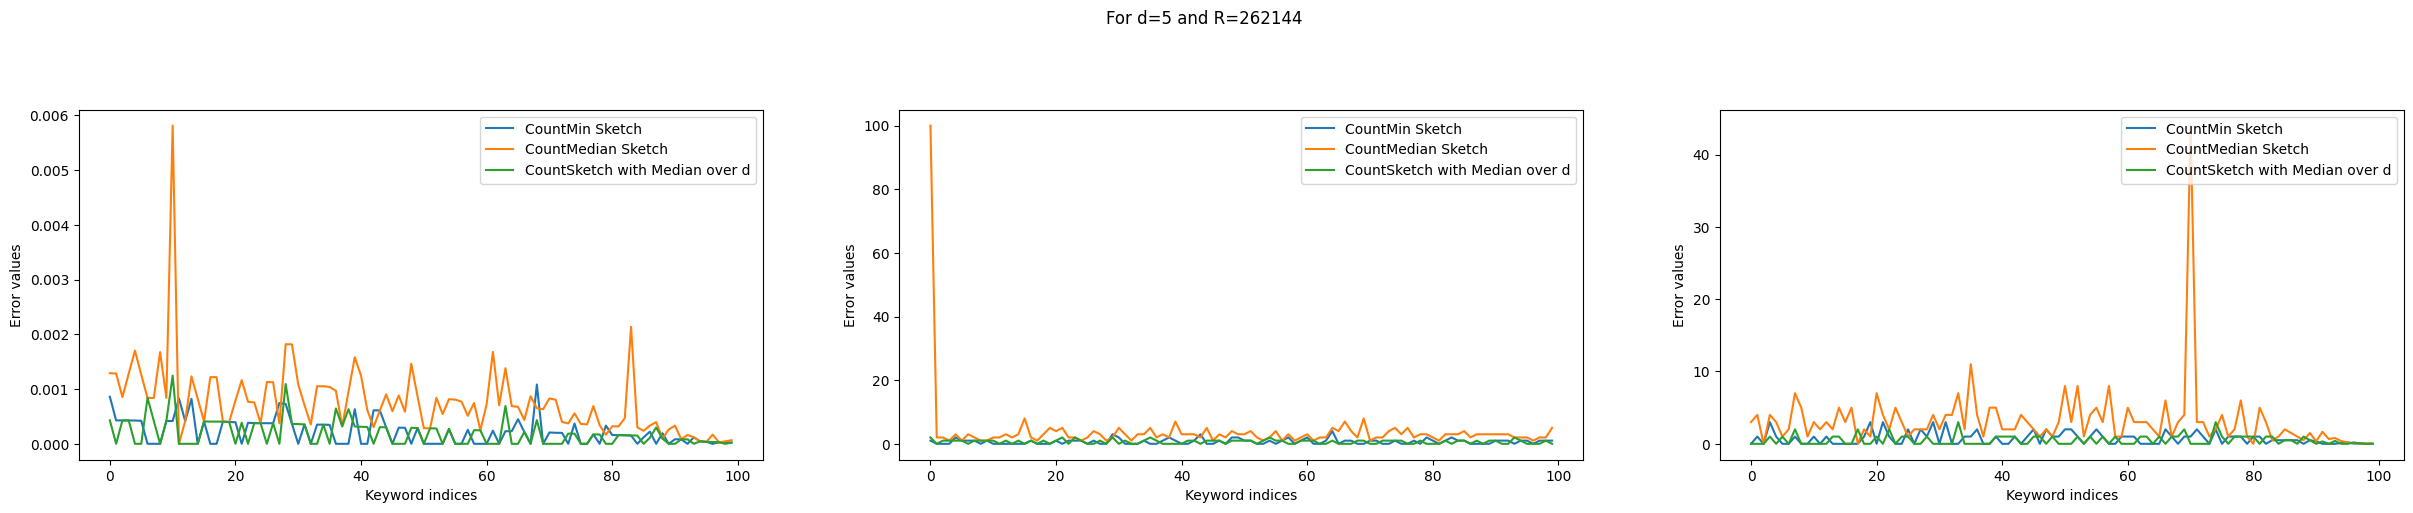

In [ ]:
for p, r in enumerate([2**10, 2**14, 2**18]):
    minsketch = minsketches[p]
    medsketch = medsketches[p]
    sketch = sketches[p]
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(f"For d=5 and R={r}")
    for j, (nd, d) in enumerate([("freq100", freq100), ("infreq100", infreq100), ("random100", random100)]):
        y1 = []
        y2 = []
        y3 = []
        x = []
        for i, (k, count) in enumerate(d):
            x.append(i)
            y1.append(np.abs((minsketch.query(k) / count) - 1))
            y2.append(np.abs((medsketch.query(k) / count) - 1))
            y3.append(np.abs((sketch.query(k) / count) - 1))
            # print(y3[-1])

        plt.subplot(2, 3, j+1, label=f"{nd}")
        plt.xlabel("Keyword indices")
        plt.ylabel("Error values")
        plt.plot(x, y1, label="CountMin Sketch")
        plt.plot(x, y2, label="CountMedian Sketch")
        plt.plot(x, y3, label="CountSketch with Median over d")
        plt.legend(loc="upper right")


In [ ]:
freq100

[('credit', 2326),
 ('game', 2338),
 ('it', 2342),
 ('video', 2343),
 ('map', 2350),
 ('old', 2381),
 ('fl', 2382),
 ('hospital', 2388),
 ('department', 2388),
 ('virginia', 2388),
 ('west', 2409),
 ('jersey', 2411),
 ('de', 2411),
 ('nj', 2434),
 ('best', 2438),
 ('carolina', 2446),
 ('white', 2464),
 ('hotels', 2465),
 ('2', 2472),
 ('all', 2517),
 ('that', 2535),
 ('ca', 2580),
 ('girls', 2604),
 ('-', 2646),
 ('me', 2652),
 ('nc', 2658),
 ('lake', 2665),
 ('world', 2681),
 ('games', 2748),
 ('day', 2753),
 ('pa', 2771),
 ('estate', 2830),
 ('island', 2835),
 ('south', 2852),
 ('movie', 2853),
 ('north', 2888),
 ('your', 3100),
 ('jobs', 3137),
 ('university', 3158),
 ('pics', 3161),
 ('club', 3215),
 ('house', 3252),
 ('california', 3266),
 ('san', 3284),
 ('do', 3323),
 ('homes', 3355),
 ('news', 3396),
 ('aol', 3414),
 ('black', 3421),
 ('car', 3466),
 ('park', 3513),
 ('hotel', 3532),
 ('real', 3571),
 ('&', 3681),
 ('college', 3684),
 ('sex', 3716),
 ('ny', 3893),
 ('online', 3

In [ ]:
mincount = []
medcount = []
count = []
for p, r in enumerate([2**10, 2**14, 2**18]):
    minsketch = minsketches[p]
    medsketch = medsketches[p]
    sketch = sketches[p]
    mincount.append(sum([1 if x in minsketch.top500 else 0 for x, y in freq100]))
    medcount.append(sum([1 if x in medsketch.top500 else 0 for x, y in freq100]))
    count.append(sum([1 if x in sketch.top500 else 0 for x, y in freq100]))

Text(0, 0.5, 'Matches found')

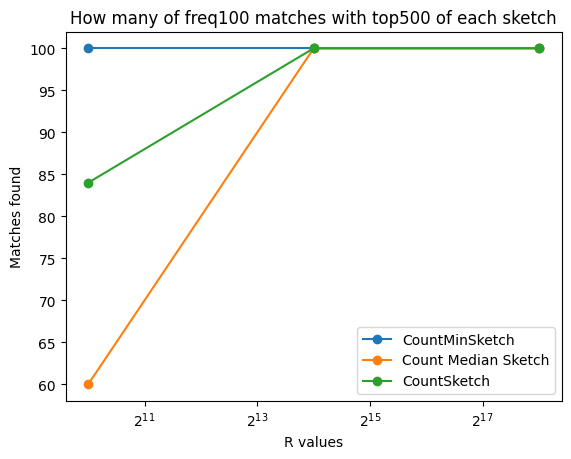

In [ ]:
plt.plot([2**10, 2**14, 2**18], mincount, label="CountMinSketch", marker="o")
plt.plot([2**10, 2**14, 2**18], medcount, label="Count Median Sketch", marker="o")
plt.plot([2**10, 2**14, 2**18], count, label="CountSketch", marker="o")
plt.legend()
plt.xscale("log", base=2)
plt.title("How many of freq100 matches with top500 of each sketch")
plt.xlabel("R values")
plt.ylabel("Matches found")